In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18

In [89]:
# データ生成（多重共線性を含む）
np.random.seed(42)
n_samples = 200  # サンプル数
X1 = np.random.rand(n_samples) 
X2 = 2 * X1 + np.random.normal(0, 0.01, n_samples)  # X1と強い相関を持つ
X3 = np.random.rand(n_samples)
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)  # 目的変数

# データフレーム化
data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})

# モデル構築用データと評価用データに分割
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

X_train = train_data[["X1", "X2", "X3"]]
y_train = train_data["y"]
X_test = test_data[["X1", "X2", "X3"]]
y_test = test_data["y"]

In [90]:


# Ridge回帰を使用して重回帰分析とリッジ回帰を統合
alphas = [0, 1.0]  # alpha=0で重回帰分析, alpha=1.0でリッジ回帰
results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 結果を記録
    results.append({
        "alpha": alpha,
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

# 結果を表示（少数点以下2桁でフォーマット）
for result in results:
    print(f"--- alpha = {result['alpha']:.2f} ---")
    print("回帰係数:", [f"{coef:.2f}" for coef in result["coefficients"]])
    print(f"切片: {result['intercept']:.2f}")
    print(f"R^2スコア（テストデータ）: {result['R2']:.2f}")
    print(f"RMSE（テストデータ）: {result['RMSE']:.2f}")

--- alpha = 0.00 ---
回帰係数: ['-19.59', '13.44', '-0.70']
切片: -0.27
R^2スコア（テストデータ）: 0.79
RMSE（テストデータ）: 1.03
--- alpha = 1.00 ---
回帰係数: ['1.39', '2.87', '-0.64']
切片: -0.21
R^2スコア（テストデータ）: 0.80
RMSE（テストデータ）: 1.01


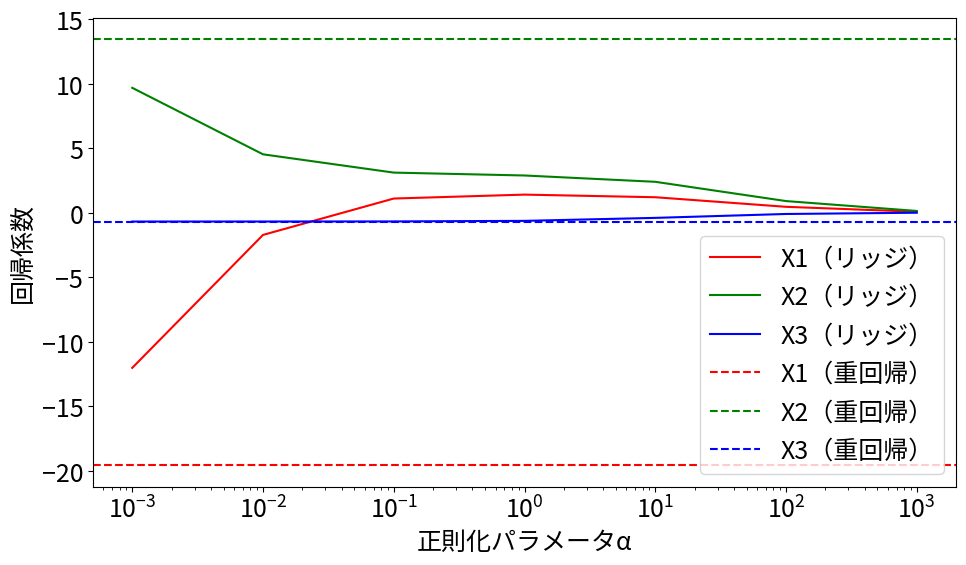

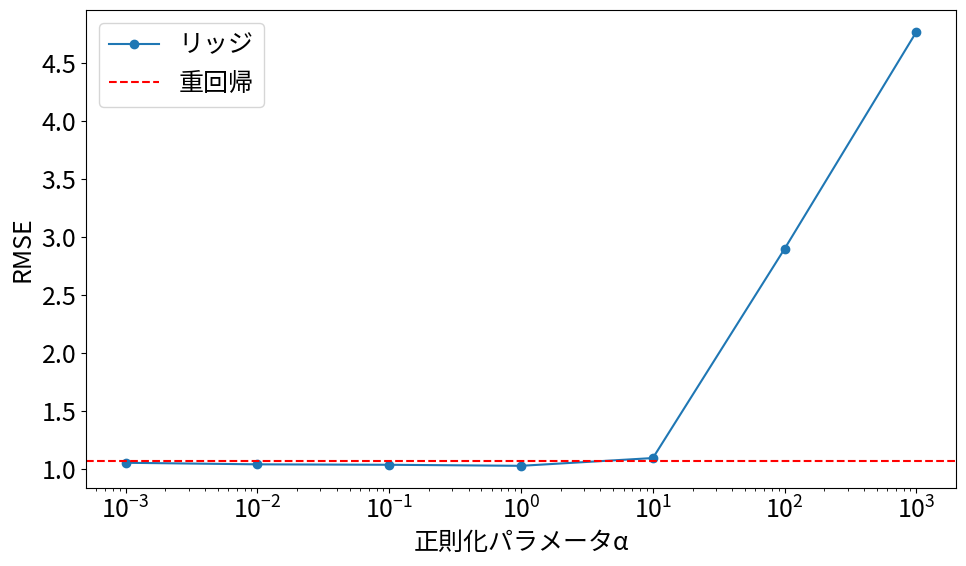

In [91]:

# alphaを広範囲で調査（リッジ回帰の挙動を確認）
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
ridge_coefs = []
ridge_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_coefs.append(model.coef_)
    ridge_scores.append(mean_squared_error(y_test, model.predict(X_test)))

ridge_coefs = np.array(ridge_coefs)


# alpha=0（重回帰）のRMSEを計算
model = Ridge(alpha=0)
model.fit(X_train, y_train)
rmse_alpha_0 = mean_squared_error(y_test, model.predict(X_test))

# alpha=0（重回帰）の回帰係数を計算
coef_alpha_0 = model.coef_

# リッジ回帰の回帰係数の変化をプロット（alpha=0の回帰係数を追加）
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs[:, 0], label="X1（リッジ）", color = "r")
plt.plot(alphas, ridge_coefs[:, 1], label="X2（リッジ）", color = "g")
plt.plot(alphas, ridge_coefs[:, 2], label="X3（リッジ）", color = "b")

# 重回帰の回帰係数を追加
plt.axhline(y=coef_alpha_0[0], color="r", linestyle="--", label="X1（重回帰）")
plt.axhline(y=coef_alpha_0[1], color="g", linestyle="--", label="X2（重回帰）")
plt.axhline(y=coef_alpha_0[2], color="b", linestyle="--", label="X3（重回帰）")

plt.xscale("log")
plt.xlabel("正則化パラメータα")
plt.ylabel("回帰係数")
plt.legend()
plt.tight_layout()
plt.savefig("figures/coef.pdf")
plt.show()

# リッジ回帰のRMSE変化をプロット（alpha=0の値を追加）
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label="リッジ", marker="o")
plt.axhline(y=rmse_alpha_0, color="r", linestyle="--", label="重回帰")
plt.xscale("log")
plt.xlabel("正則化パラメータα")
plt.ylabel("RMSE")
plt.legend()
plt.tight_layout()
plt.savefig("figures/rmse.pdf")
plt.show()

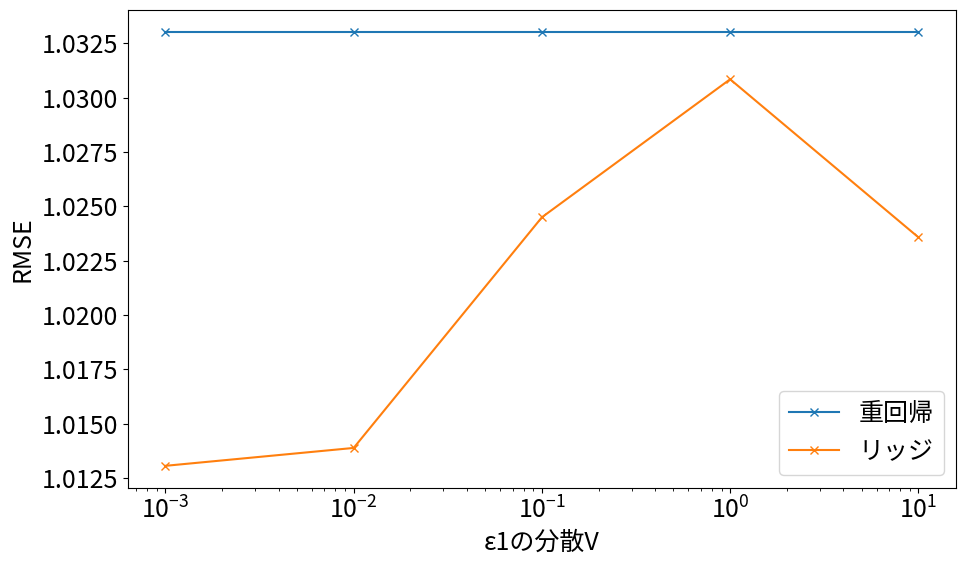

In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 多重共線性の強さを変える実験
correlation_strengths =[0.001, 0.01, 0.1, 1, 10]
n_samples = 200  # サンプル数
results = []

for strength in correlation_strengths:
    np.random.seed(42)
    # 説明変数の生成
    X1 = np.random.rand(n_samples) 
    X2 = 2 * X1 + np.random.normal(0, strength, n_samples)
    X3 = np.random.rand(n_samples) 
    y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)  # 目的変数

    # データ分割
    data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

    X_train = train_data[["X1", "X2", "X3"]]
    y_train = train_data["y"]
    X_test = test_data[["X1", "X2", "X3"]]
    y_test = test_data["y"]

    # 重回帰分析 (Ridge alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 0,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # リッジ回帰 (alpha=1.0)
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 1.0,
        "Coefficients": model_ridge.coef_,
        "Intercept": model_ridge.intercept_,
        "R2": r2_score(y_test, y_pred_ridge),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    })
results_df = pd.DataFrame(results)


# RMSEのプロット
plt.figure(figsize=(10, 6))
alpha = 0.0
subset = results_df[results_df["Alpha"] == alpha]
plt.plot(
    subset["Correlation Strength"],
    subset["RMSE"],
    label=f"重回帰",
    marker="x",
)
alpha = 1.0
subset = results_df[results_df["Alpha"] == alpha]
plt.plot(
    subset["Correlation Strength"],
    subset["RMSE"],
    label=f"リッジ",
    marker="x",
)
plt.xscale("log")
plt.xlabel("ε1の分散V")
plt.ylabel("RMSE")
plt.legend()
plt.tight_layout()
plt.savefig("figures/rmse_strength.pdf")
plt.show()

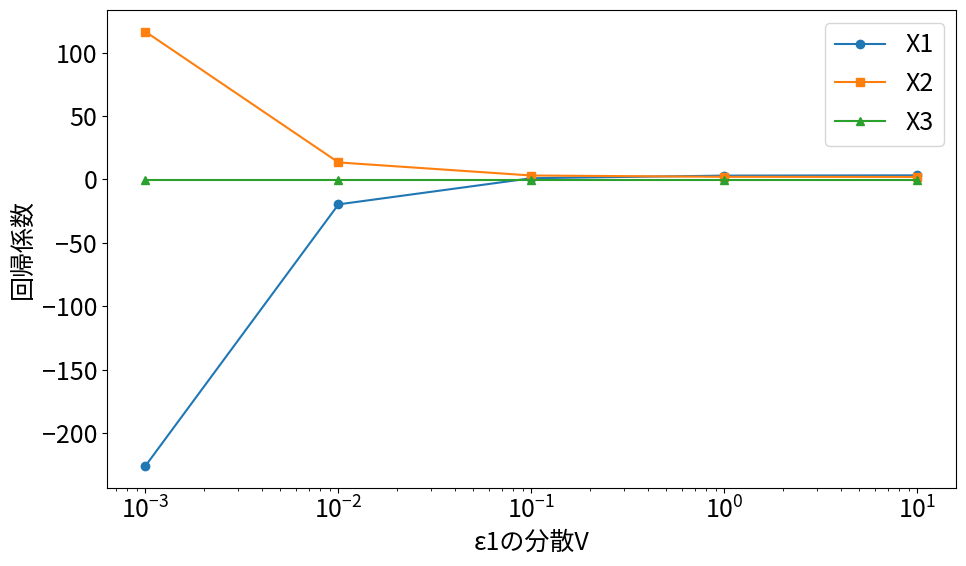

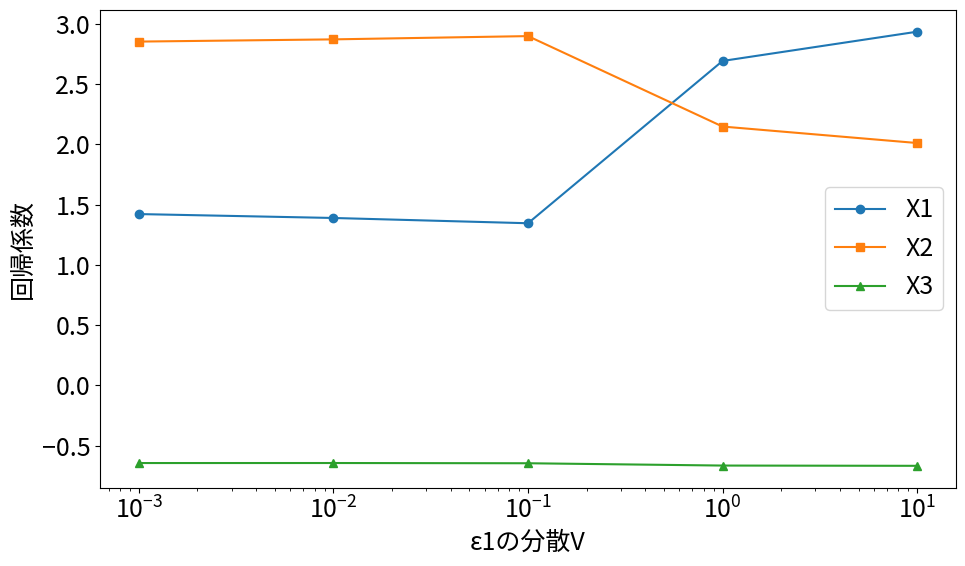

In [93]:
coefficients = []

for alpha in [0, 1.0]:  # alpha=0が重回帰、alpha=1がリッジ回帰
    subset = results_df[results_df["Alpha"] == alpha]
    for _, row in subset.iterrows():
        coefficients.append({
            "Correlation Strength": row["Correlation Strength"],
            "Alpha": alpha,
            "Coefficient X1": row["Coefficients"][0],
            "Coefficient X2": row["Coefficients"][1],
            "Coefficient X3": row["Coefficients"][2],
        })

coefficients_df = pd.DataFrame(coefficients)
# 重回帰 (alpha=0) のプロット
plt.figure(figsize=(10, 6))
subset = coefficients_df[coefficients_df["Alpha"] == 0]
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X1"], label="X1", marker="o"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X2"], label="X2", marker="s"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X3"], label="X3", marker="^"
)

plt.xscale("log")
plt.xlabel("ε1の分散V")
plt.ylabel("回帰係数")
plt.legend()
plt.tight_layout()
plt.savefig("figures/coef_strength_mla.pdf")
plt.show()

# リッジ回帰 (alpha=1.0) のプロット
plt.figure(figsize=(10, 6))
subset = coefficients_df[coefficients_df["Alpha"] == 1.0]
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X1"], label="X1", marker="o"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X2"], label="X2", marker="s"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X3"], label="X3", marker="^"
)

plt.xscale("log")
plt.xlabel("ε1の分散V")
plt.ylabel("回帰係数")
plt.legend()
plt.tight_layout()
plt.savefig("figures/coef_strength_ridge.pdf")
plt.show()

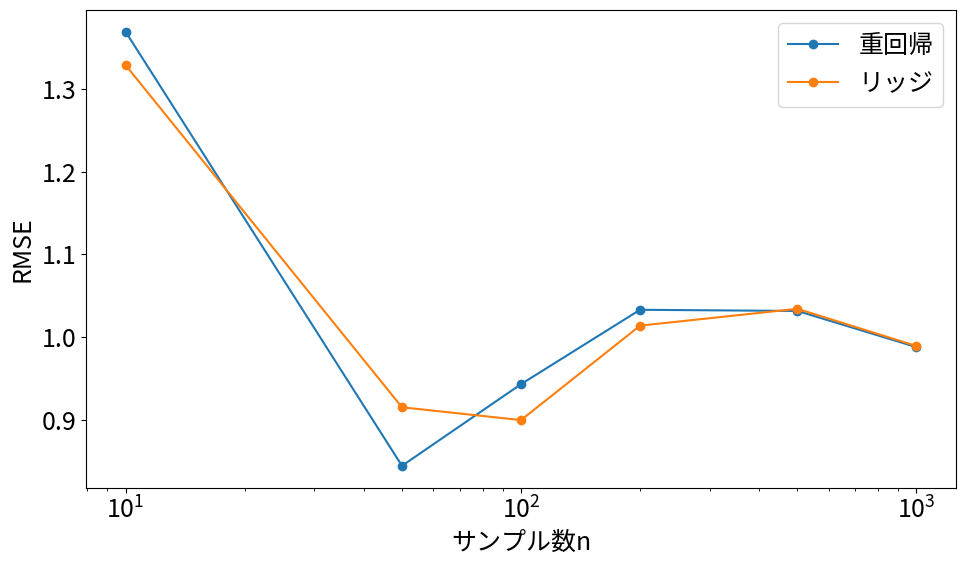

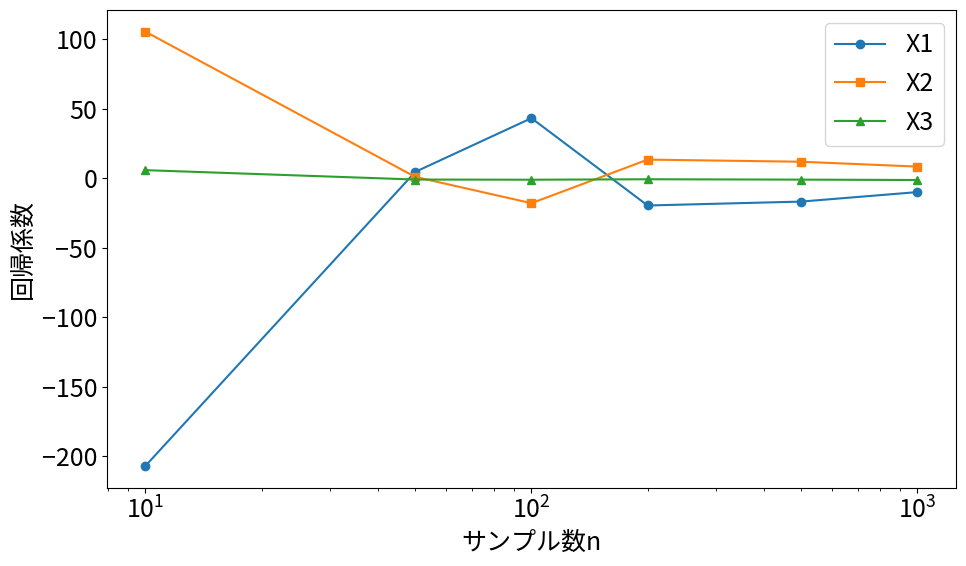

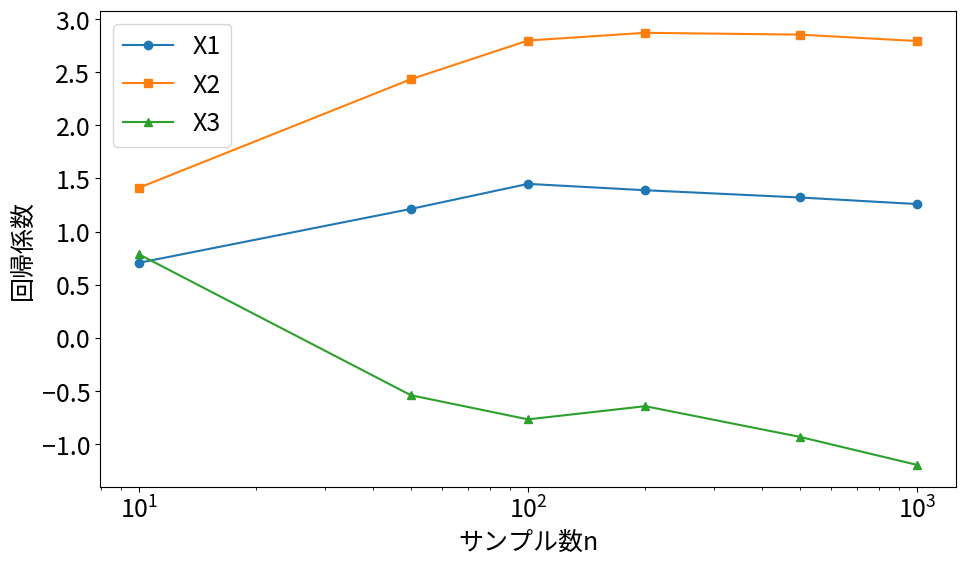

In [94]:
sample_sizes = [10, 50, 100, 200, 500, 1000]  # サンプル数の設定
correlation_strength = 0.01  # 固定された多重共線性の強さ
results_sample_size = []

for n_samples in sample_sizes:
    np.random.seed(42)
    # 説明変数の生成
    X1 = np.random.rand(n_samples)
    X2 = 2 * X1 + np.random.normal(0, correlation_strength, n_samples)
    X3 = np.random.rand(n_samples)
    y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)  # 目的変数

    # データ分割
    data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

    X_train = train_data[["X1", "X2", "X3"]]
    y_train = train_data["y"]
    X_test = test_data[["X1", "X2", "X3"]]
    y_test = test_data["y"]

    # 重回帰分析 (Ridge alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_sample_size.append({
        "Sample Size": n_samples,
        "Alpha": 0,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # リッジ回帰 (alpha=1.0)
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    results_sample_size.append({
        "Sample Size": n_samples,
        "Alpha": 1.0,
        "Coefficients": model_ridge.coef_,
        "Intercept": model_ridge.intercept_,
        "R2": r2_score(y_test, y_pred_ridge),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    })

results_sample_size_df = pd.DataFrame(results_sample_size)

# プロット: RMSE vs サンプル数
plt.figure(figsize=(10, 6))
alpha = 0
subset = results_sample_size_df[results_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"],
    subset["RMSE"],
    label=f"重回帰",
    marker="o",
)
alpha = 1.0
subset = results_sample_size_df[results_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"],
    subset["RMSE"],
    label=f"リッジ",
    marker="o",
)
    

plt.xscale("log")
plt.xlabel("サンプル数n")
plt.ylabel("RMSE")
plt.legend()
plt.tight_layout()
plt.savefig("figures/rmse_sample_size.pdf")
plt.show()

# プロット: 回帰係数 vs サンプル数
coefficients_sample_size = []

for alpha in [0, 1.0]:
    subset = results_sample_size_df[results_sample_size_df["Alpha"] == alpha]
    for _, row in subset.iterrows():
        coefficients_sample_size.append({
            "Sample Size": row["Sample Size"],
            "Alpha": alpha,
            "Coefficient X1": row["Coefficients"][0],
            "Coefficient X2": row["Coefficients"][1],
            "Coefficient X3": row["Coefficients"][2],
        })

coefficients_sample_size_df = pd.DataFrame(coefficients_sample_size)

plt.figure(figsize=(10, 6))
alpha = 0
subset = coefficients_sample_size_df[coefficients_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"], subset["Coefficient X1"], label=f"X1", marker="o"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X2"], label=f"X2", marker="s"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X3"], label=f"X3", marker="^"
)

plt.xscale("log")
plt.xlabel("サンプル数n")
plt.ylabel("回帰係数")
plt.legend()
plt.tight_layout()
plt.savefig("figures/coef_sample_size_mla.pdf")
plt.show()


plt.figure(figsize=(10, 6))
alpha = 1.0
subset = coefficients_sample_size_df[coefficients_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"], subset["Coefficient X1"], label=f"X1", marker="o"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X2"], label=f"X2", marker="s"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X3"], label=f"X3", marker="^"
)

plt.xscale("log")
plt.xlabel("サンプル数n")
plt.ylabel("回帰係数")
plt.legend()
plt.tight_layout()
plt.savefig("figures/coef_sample_size_ridge.pdf")
plt.show()